In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Pittsburgh_healthy_bikeshare.csv", parse_dates = ["start_time","stop_time"])

In [145]:
df.head(2)

,start_time,trip_id,stop_time,bike_id,trip_duration,from_station_id,from_station_name,to_station_id,station_name,user_type,...,date,hour,month,tr_du_mins,tr_du_hr,speed,row_count,day_of_the_week,start_time_hour,start_time_day_name
0,2015-05-31 07:18:00,10677999,2015-05-31 07:52:00,70381,2018,1019,42nd St & Butler St,1001,Forbes Ave & Market Square,Subscriber,...,2015-05-31,7,5,33.633333,0.560556,5.41,8,Sunday,7,Sunday
1,2015-05-31 07:25:00,10678335,2015-05-31 07:57:00,70331,1900,1005,Forbes Ave & Grant St,1000,Liberty Ave & Stanwix St,Customer,...,2015-05-31,7,5,31.666667,0.527778,0.80,12,Sunday,7,Sunday


In [146]:
df.shape

(163377, 32)

In [147]:
import datetime 
df["year"] = df['start_time'].dt.year
df.columns

Index(['start_time', 'trip_id', 'stop_time', 'bike_id', 'trip_duration',
       'from_station_id', 'from_station_name', 'to_station_id', 'station_name',
       'user_type', 'TMAX', 'TMIN', 'season', 'holiday', 'walk_score',
       'transit_score', 'bike_score', 'distance', 'event_type', 'rain', 'wind',
       'weather', 'date', 'hour', 'month', 'tr_du_mins', 'tr_du_hr', 'speed',
       'row_count', 'day_of_the_week', 'start_time_hour',
       'start_time_day_name', 'year'],
      dtype='object')

In [148]:
df.drop(df.loc[df['user_type']=="Daily"].index, inplace=True)

In [149]:
df.shape

(163377, 33)

In [150]:
# convert trip duration into minutes
df["tr_du_mins"] = df['trip_duration'].div(60)

# converting trip duration into hours
df["tr_du_hr"] = df["tr_du_mins"].div(60)

# to calculate how fast does the rider rides the bike, i will be creating a new column "speed" which calculates the speed in miles per hour
df['speed'] = round(df['distance'] /df['tr_du_hr'], 2)

df['speed'].value_counts()

5.14     354
4.73     303
5.41     299
5.26     292
5.11     291
5.54     291
5.34     291
5.25     288
5.18     288
5.16     286
4.60     286
4.58     286
5.06     285
4.70     285
5.28     284
4.66     284
4.65     284
5.81     284
5.68     283
6.00     282
5.08     282
5.62     282
4.78     281
5.32     281
4.89     280
5.21     279
4.67     277
4.86     276
5.23     276
5.19     275
        ... 
14.22      1
15.74      1
19.78      1
26.24      1
17.32      1
13.93      1
12.42      1
23.82      1
16.01      1
17.07      1
16.20      1
16.62      1
14.61      1
29.07      1
29.85      1
19.51      1
22.36      1
16.54      1
22.03      1
22.97      1
20.68      1
29.88      1
20.17      1
19.63      1
16.88      1
20.63      1
18.61      1
17.44      1
16.43      1
16.38      1
Name: speed, Length: 1674, dtype: int64

In [151]:
import matplotlib.pyplot as plt

folium_map = folium.Map(location=[40.40, -80.00],
                        zoom_start=10,
                        tiles="CartoDB dark_matter")

folium.CircleMarker(location=[40.44, -80.00],fill=True).add_to(folium_map)
folium_map


In [152]:
bike_data = pd.read_csv("Bike-Share-Project-master/Bike-Share-Project-master/bike_rides.csv")


In [153]:
bike_data['hour'] = pd.to_datetime(bike_data['start_time']).dt.hour

In [154]:
bike_data.columns

Index(['trip_id', 'start_time', 'stop_time', 'bike_id', 'trip_duration',
       'from_station_id', 'from_station_name', 'to_station_id', 'station_name',
       'user_type  ', 'from_latitude', 'from_longitude', 'to_latitude',
       'to_longitude', 'TMAX', 'TMIN', 'season', 'holiday', 'walk_score',
       'transit_score', 'bike_score', 'distance', 'event_type', 'rain', 'wind',
       'weather', 'hour'],
      dtype='object')

In [155]:
def get_trip_counts_by_hour(selected_hour):
    # make a DataFrame with locations for each bike station
    locations = bike_data.groupby('from_station_id').first()
    locations = locations.loc[:, ['from_latitude',
                                 'from_longitude',
                                 'from_station_name']]
    
    #select one time of day
    subset = bike_data[bike_data["hour"]==selected_hour]
    
    # count trips for each destination
    departure_counts =  subset.groupby('from_station_id').count()
    departure_counts = departure_counts.iloc[:,[0]]
    departure_counts.columns= ["Departure Count"]
    
    # count trips for each origin
    arrival_counts =  subset.groupby('to_station_id').count().iloc[:,[0]]
    arrival_counts.columns= ["Arrival Count"]

    #join departure counts, arrival counts, and locations
    trip_counts = departure_counts.join(locations).join(arrival_counts)
    return trip_counts

# print a sample to check our code works
get_trip_counts_by_hour(6).head()

,Departure Count,from_latitude,from_longitude,from_station_name,Arrival Count
from_station_id,,,,,
1000,37,40.441326,-80.004679,Liberty Ave & Stanwix St,116
1001,55,40.440877,-80.003080,Forbes Ave & Market Square,361
1002,31,40.439030,-80.001860,Third Ave & Wood St,237
1003,58,40.437200,-80.000375,First Ave & Smithfield St (Art Institute),35
1004,19,40.435800,-79.996877,First Ave & B St (T Station),87


In [156]:
def plot_station_counts(trip_counts):
    # generate a new map
    folium_map = folium.Map(location=[40.45, -80.00],
                        zoom_start=13,
                        )


    # for each row in the data, add a cicle marker
    for index, row in trip_counts.iterrows():
        # calculate net departures
        net_departures = (row["Departure Count"]-row["Arrival Count"])
        
        # generate the popup message that is shown on click.
        popup_text = "{}<br> total departures: {}<br> total arrivals: {}<br> net departures: {}"
        popup_text = popup_text.format(row["from_station_name"],
                          row["Arrival Count"],
                          row["Departure Count"],
                          net_departures)
        
        # radius of circles
        radius = net_departures/20
        
        # choose the color of the marker
        if net_departures>0:
            #color="#FFCE00" # orange
            color = 'black'
            #color="#FFCE00" # yellow 
        else:
             color="#0375B4" # blue
             #color="#007849" # green      
            
        
        # add marker to the map
        folium.CircleMarker(location=(row['from_latitude'],
                                      row['from_longitude']),
                            radius=radius,
                            color=color,
                            popup=popup_text,
                            fill=True).add_to(folium_map)
    return folium_map

In [157]:
# plot net departures at 9AM

trip_counts = get_trip_counts_by_hour(9)
plot_station_counts(trip_counts)

In [3]:
import folium
from folium import plugins
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [4]:
df = pd.read_csv("Bike-Share-Project-master/Bike-Share-Project-master/bike_rides.csv")

In [5]:
df.columns

Index(['trip_id', 'start_time', 'stop_time', 'bike_id', 'trip_duration',
       'from_station_id', 'from_station_name', 'to_station_id', 'station_name',
       'user_type  ', 'from_latitude', 'from_longitude', 'to_latitude',
       'to_longitude', 'TMAX', 'TMIN', 'season', 'holiday', 'walk_score',
       'transit_score', 'bike_score', 'distance', 'event_type', 'rain', 'wind',
       'weather'],
      dtype='object')

In [6]:
#40°26′31.20″ North, longitude 80°00′00.00″ West.
m = folium.Map([40.26, -80.00], zoom_start=11)
m

In [8]:
import os
from folium.plugins import MarkerCluster
import folium

from folium.plugins import HeatMap

remove_bad_values = False
city_name = 'Pittsburgh'

In [9]:
min_lat = df["from_latitude"].min()

In [10]:
min_lat

40.42802

In [11]:
max_lat = df["from_latitude"].max()
max_lat

40.470188

In [12]:
min_lon = df["from_longitude"].min()
min_lon

-80.013204

In [13]:
max_lon = df["from_longitude"].max()
max_lon

-79.91524799999998

In [14]:
# define centre of map
Pit_COORDINATES = (df['from_latitude'].mean(), df['from_longitude'].mean())
 
  
# create empty map zoomed in on Toronto
map_pit = folium.Map(location=Pit_COORDINATES, zoom_start=12)
df['count'] = 1

# define heat map

HeatMap(data=df[['from_latitude', 'from_longitude', 'count']].groupby(['from_latitude', 'from_longitude']).sum().reset_index().values.tolist(),
        radius=13, max_zoom=15).add_to(map_pit)


display(map_pit)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
map_pit

In [172]:

 
  
# create empty map zoomed in on Toronto
map_pit1 = folium.Map(location=Pit_COORDINATES, zoom_start=12)

# define heat map

HeatMap(data=df[['to_latitude', 'to_longitude', 'count']].groupby(['to_latitude', 'to_longitude']).sum().reset_index().values.tolist(), radius=13, max_zoom=15).add_to(map_tor1)


display(map_tor1)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [173]:
map_tor1

In [174]:
df = pd.read_csv("pittsburgh_healthy_rides_data.csv")

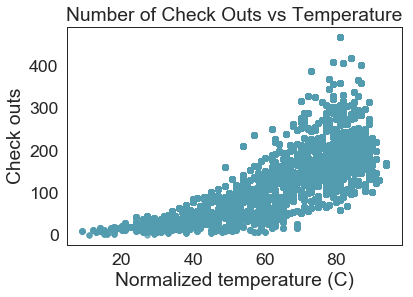

In [175]:
# reuse code within and across notebooks
def scatterplot(x_data, y_data, x_label, y_label, title):

    # Create the plot object
    _, ax = plt.subplots()

    # Plot the data, set the size (s), color and transparency (alpha)
    # of the points
    ax.scatter(x_data, y_data, s = 30, color = '#539caf', alpha = 0.75)

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
# Call the function to create plot
scatterplot(x_data = df['TMAX']
            , y_data = df['num_trips']
            , x_label = 'Normalized temperature (C)'
            , y_label = 'Check outs'
            , title = 'Number of Check Outs vs Temperature')


Text(0.5, 1, 'Bike Rentals vs. Temperature by seasons')

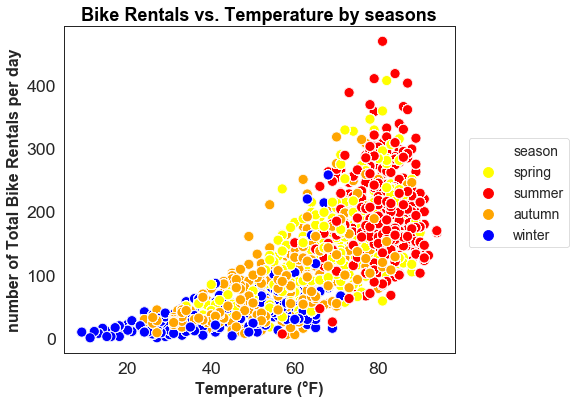

In [176]:
#The plot below depicts the seasonality of bike rentals based on temperatures:
   
plt.figure(figsize=(7,6))
fontdict={'fontsize': 18, 'weight' : 'bold', 'horizontalalignment': 'center'}
sns.set_context('paper', font_scale=2) #this makes the font and scatterpoints much smaller
sns.set_style('white')
sns.scatterplot(x='TMAX', y='num_trips', hue = 'season', data= df,  palette=['yellow','red','orange','blue'], legend='full', size='season', sizes=[100,100,100,100])
plt.legend(scatterpoints=1, bbox_to_anchor=(1, 0.7), loc=2, borderaxespad=1., ncol=1, fontsize=14)
plt.xlabel('Temperature (°F)', fontsize=16, fontweight='bold')
plt.ylabel('number of Total Bike Rentals per day', fontsize=16, fontweight='bold')
plt.title('Bike Rentals vs. Temperature by seasons', fontdict=fontdict, color="black", position=(0.5,1))

Text(0.5, 1, 'Bike Rentals vs. Temperature by seasons')

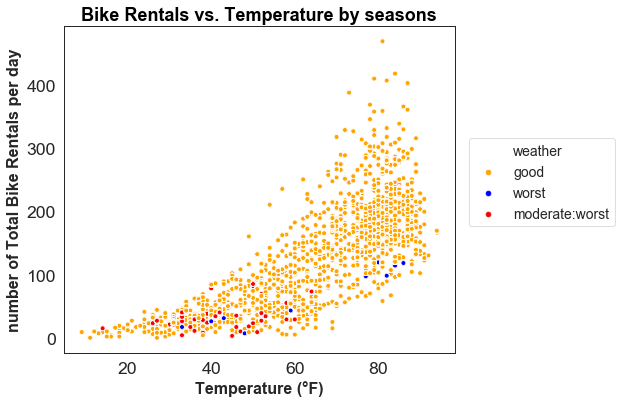

In [177]:
#The plot below depicts the seasonality of bike rentals based on temperatures:
   
plt.figure(figsize=(7,6))
fontdict={'fontsize': 18, 'weight' : 'bold', 'horizontalalignment': 'center'}
sns.set_context('paper', font_scale=2) #this makes the font and scatterpoints much smaller
sns.set_style('white')
sns.scatterplot(x='TMAX', y='num_trips', hue = 'weather', data= df,  palette=['orange','blue','red'], legend='full',  sizes=[100,100,100])
plt.legend(scatterpoints=1, bbox_to_anchor=(1, 0.7), loc=2, borderaxespad=1., ncol=1, fontsize=14)
plt.xlabel('Temperature (°F)', fontsize=16, fontweight='bold')
plt.ylabel('number of Total Bike Rentals per day', fontsize=16, fontweight='bold')
plt.title('Bike Rentals vs. Temperature by seasons', fontdict=fontdict, color="black", position=(0.5,1))